# Trabalho Final - Análise de Dados com Python

Integrantes:

    1) Laura Munhoz Friozi
    2) Julio Cesar Falcon
    3) Julio Cesar Kenji
    4) Cristian Insfran

### Enunciado

A QuantumFinance possui um modelo de risco de crédito desatualizado, que tem concedido cartões para um número muito alto de mau pagadores e gerando problemas financeiros para a companhia.

O objetivo é realizar uma análise exploratória para compreender o comportamento dos dados e tentar descobrir um padrão que explique e diferencie clientes bons de maus pagadores.

Seu trabalho é:

1. Explorar e analisar os dados para entender a distribuição das características e a relação com a classificação de cada cliente.

2. Responder as seguintes perguntas:

    * 2.1 Como as features sexo, estado civil, quantidade de dependentes e nível educacional está relacionada com a variável meta? 
    * 2.2 Plote um gráfico que mostre a distribuição de bons e maus pagadores por estado. Escolha o gráfico que achar mais conveniente
    * 2.3 Use boxplot para explicar como o tipo de residência interfere na classificação do pagador
    * 2.4 Como as features renda pessoal mensal e outras rendas se relacionam com a variável meta? (obs: não é correlação estatística)
    * 2.5 A idade interfere na classificação do pagador?

#### Entregáveis:

Jupyter Notebook:  O notebook deverá estar bem organizado com seções claras e textos que facilitem a compreensão da análise e decisões tomadas e que permita a obtenção do resultado final a partir do dataset disponibilizado.


PERGUNTA 1 
1.  Explorar e analisar os dados para entender a distribuição das características e a relação com a classificação de cada cliente.  Como classificar os cliente? 
# RESPOSTA 1 : Gerei um relatório sweetviz vizualizar facilmente algumas variaveis. 



In [5]:
#1 Explorar e analisar os dados para entender a distribuição das características e a relação com a classificação de cada cliente.  Como classificar os cliente? Renda mensal x estado civel
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sweetviz

# Leitura do arquivo CSV
df = pd.read_csv("credit.csv", encoding='unicode_escape', sep='\t', header=None)

# Conversão das colunas 51 e 52 para numérico
df[51] = pd.to_numeric(df[51], errors='coerce')
df[52] = pd.to_numeric(df[52], errors='coerce')

# Remover linhas com NaN nas colunas 51 e 52
df = df.dropna(subset=[51, 52])

# Geração do relatório
relatorio = sweetviz.analyze(df)
relatorio.show_html('RELATORIO_credito.html')

/var/folders/1_/71tpy68j3wd3jq9yqnrw15wm0000gn/T/ipykernel_6673/529182799.py:8: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("credit.csv", encoding='unicode_escape', sep='\t', header=None)


                                             |          | [  0%]   00:00 -> (? left)

Report RELATORIO_credito.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


 2.1 A análise das variáveis em relação à meta revela alguns padrões interessantes, com destaque para o sexo e a quantidade de dependentes. A seguir, as conclusões de cada uma dessas variáveis:

# RESPOSTA: Sexo x Meta: A única variável com relação clara e significativa à meta é o sexo. Os dados indicam que 46% das mulheres são boas pagadoras, enquanto apenas 27,6% dos homens apresentam o mesmo comportamento. Isso sugere que, no geral, as mulheres tendem a pagar melhor do que os homens.

# Estado civil x Meta: A variável estado civil não fornece informações claras sobre o impacto no comportamento de pagamento. Não é possível identificar se pessoas solteiras ou casadas pagam melhor, uma vez que a faixa etária ou a situação de estado civil não foi suficientemente detalhada para essa análise.

# # Quantidade de dependentes x Meta: Observando a variável quantidade de dependentes, notamos que 49% das pessoas sem filhos são boas pagadoras. Esse dado sugere que a falta de dependentes pode estar associada a uma maior probabilidade de pagamento em dia.

# Nível educacional x Meta: Não é possível tirar conclusões claras sobre a relação entre nível educacional e a meta, já que as faixas de nível educacional não fornecem informações suficientes para determinar se o grau de escolaridade influencia a probabilidade de ser um bom ou mau pagador.

# Em resumo, é possível estabelecer uma relação entre o sexo, a quantidade de dependentes e a meta. A partir dos gráficos, verificamos que 61,6% dos clientes do banco são mulheres e que 67% não possuem filhos, sendo 42,7% dessas mulheres. Esses dados indicam que mulheres sem filhos podem ter um perfil de pagamento mais consistente.


/var/folders/1_/71tpy68j3wd3jq9yqnrw15wm0000gn/T/ipykernel_6673/789941296.py:8: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("credit.csv", encoding='unicode_escape', sep='\t', header=None)


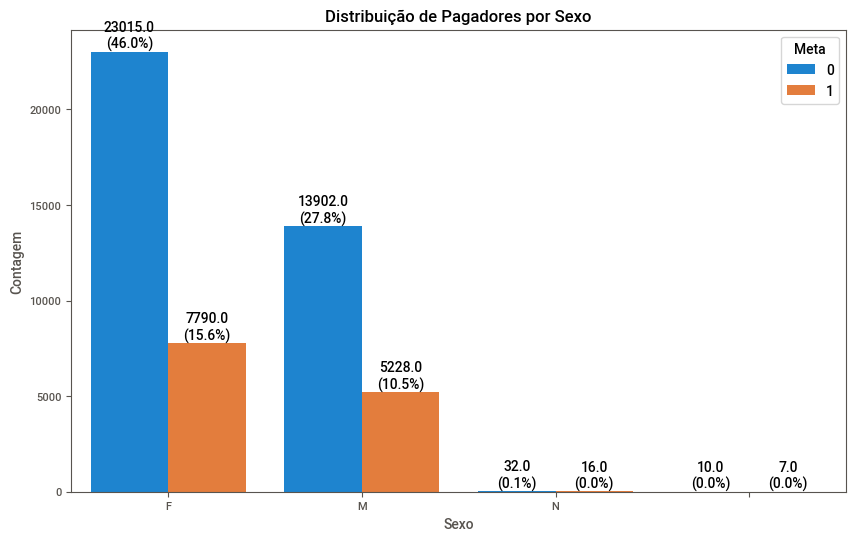

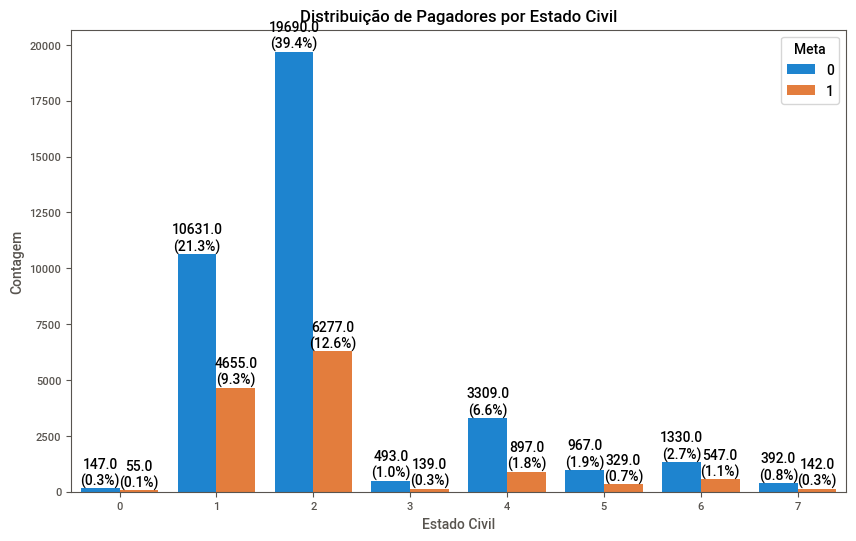

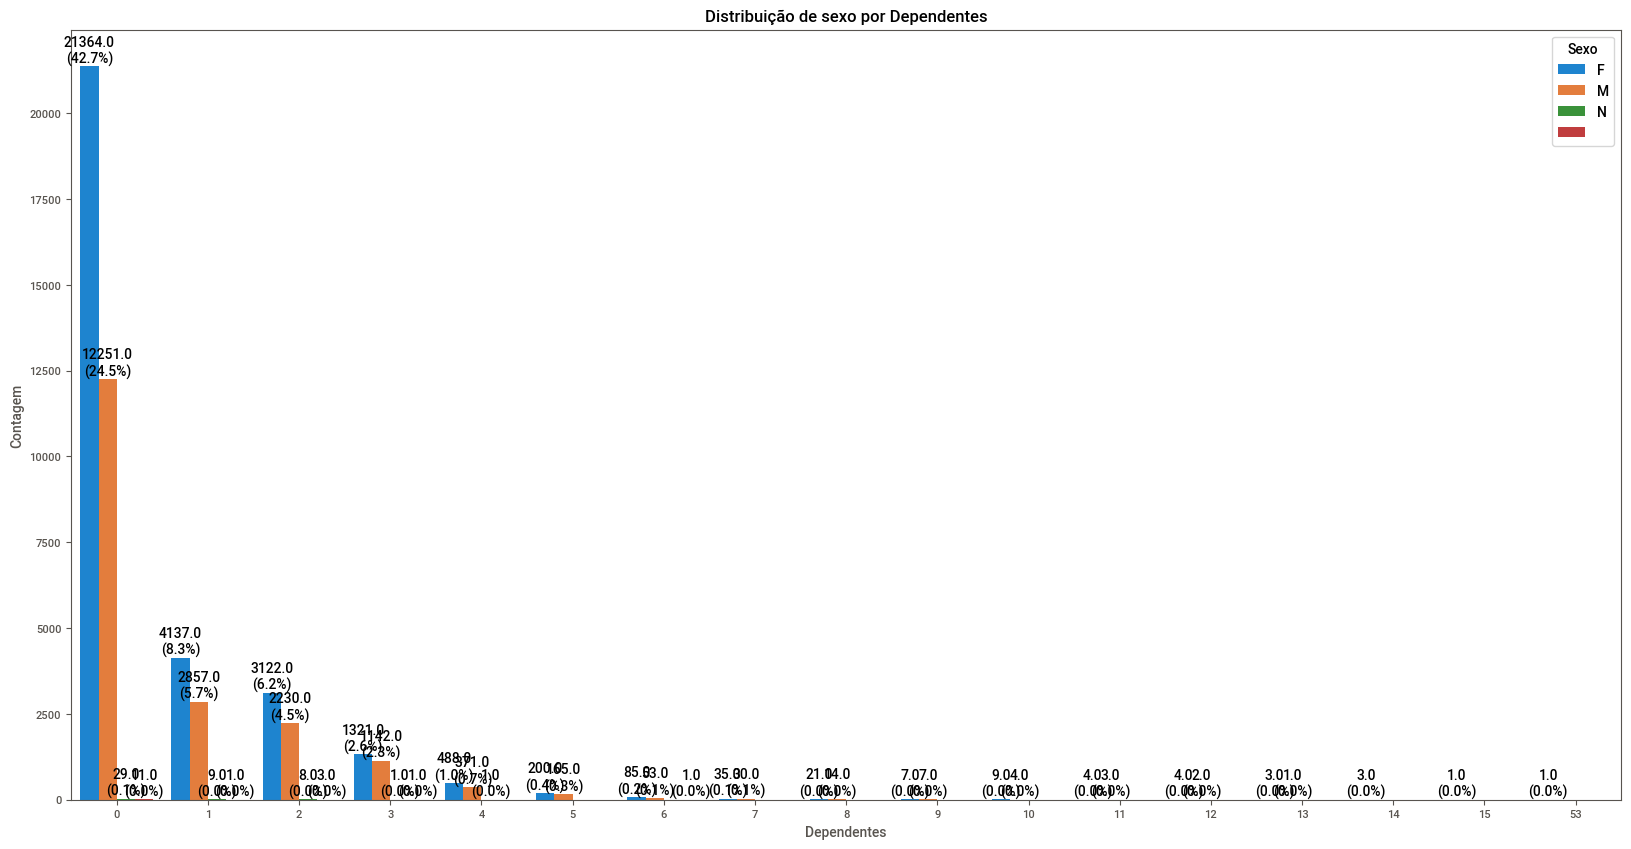

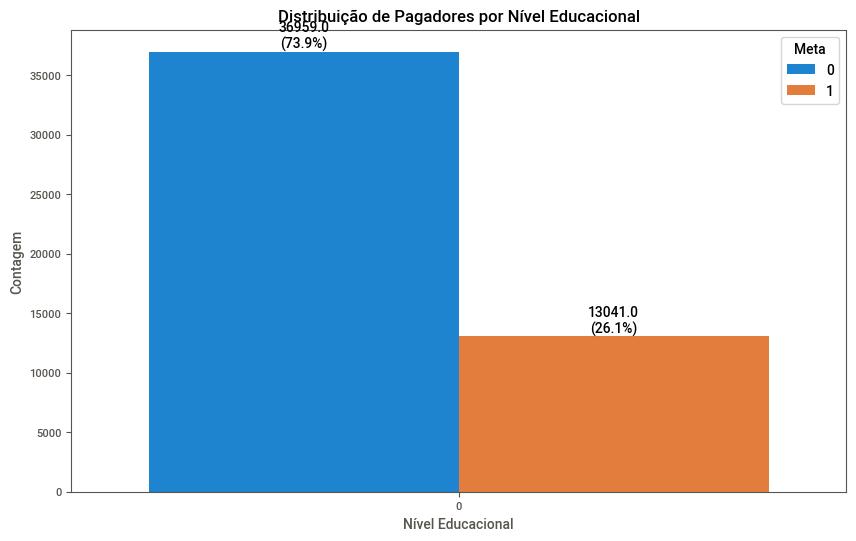

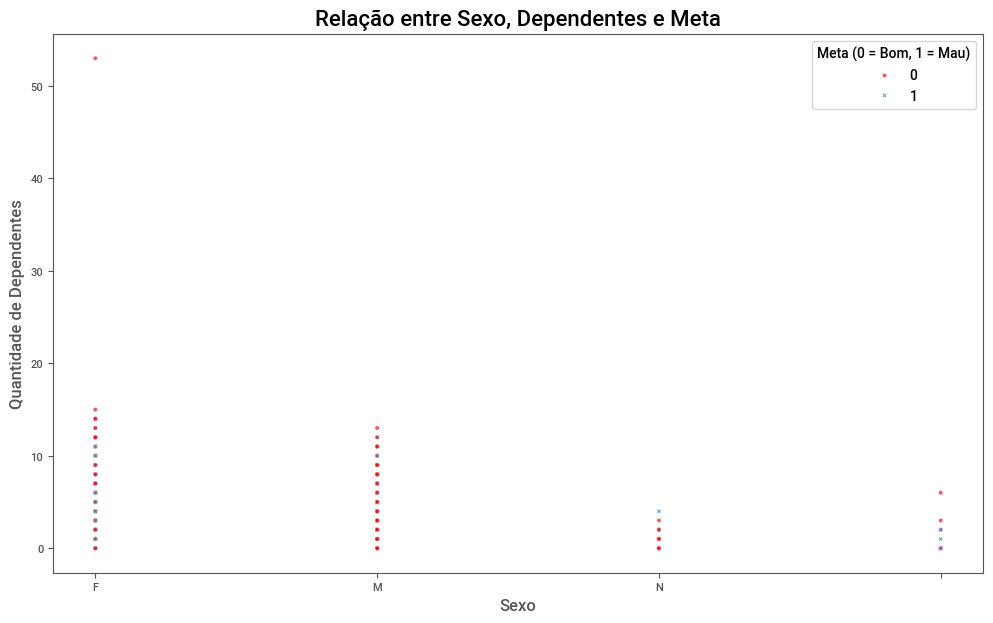

In [49]:
#2.1 Como as features sexo, estado civil, quantidade de dependentes e nível educacional está relacionada com a variável meta? 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ====== Carregar os dados ======
df = pd.read_csv("credit.csv", encoding='unicode_escape', sep='\t', header=None)

# Mapeamento das colunas principais
sexo = df[6]           # Coluna 7 sexo
estado_civil = df[7]   # Coluna 8 estado civil
dependentes = df[8]    # Coluna 9 quantidade de dependentes
nivel_educacional = df[9] # Coluna 10 nível educacional
meta = df[53]          # Coluna meta (Bom = 0, Mau = 1)

# Criar DataFrame organizado
dados = pd.DataFrame({
    'Sexo': sexo,
    'Estado_Civil': estado_civil,
    'Dependentes': dependentes,
    'Nivel_Educacional': nivel_educacional,
    'Meta': meta
})

# Remover valores nulos
dados = dados.dropna()

# ====== Visualizações ======
def add_percentages(ax):
    total = len(dados)
    for container in ax.containers:
        labels = []
        for count in container.datavalues:
            percentage = f"{(count / total * 100):.1f}%"
            labels.append(f"{count}\n({percentage})")
        ax.bar_label(container, labels=labels, label_type='edge')

# Visualização: Gráfico de barras para sexo vs meta
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Sexo', hue='Meta', data=dados, dodge=True)
add_percentages(ax)
plt.title('Distribuição de Pagadores por Sexo')
plt.ylabel('Contagem')
plt.xlabel('Sexo')
plt.show()

# Visualização: Gráfico de barras para estado civil vs meta
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Estado_Civil', hue='Meta', data=dados, dodge=True)
add_percentages(ax)
plt.title('Distribuição de Pagadores por Estado Civil')
plt.ylabel('Contagem')
plt.xlabel('Estado Civil')
plt.show()

# Visualização: Gráfico de barras para dependentes vs meta
plt.figure(figsize=(20, 10))
ax = sns.countplot(x='Dependentes', hue='Sexo', data=dados, dodge=True)
add_percentages(ax)
plt.title('Distribuição de sexo por Dependentes')
plt.ylabel('Contagem')
plt.xlabel('Dependentes')
plt.show()

# Visualização: Gráfico de barras para nível educacional vs meta
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Nivel_Educacional', hue='Meta', data=dados, dodge=True)
add_percentages(ax)
plt.title('Distribuição de Pagadores por Nível Educacional')
plt.ylabel('Contagem')
plt.xlabel('Nível Educacional')
plt.show()

## Relacionar Sexo, Quantidade de Dependentes e Meta
plt.figure(figsize=(12, 7))
sns.scatterplot(
    x='Sexo', 
    y='Dependentes', 
    hue='Meta', 
    data=dados, 
    alpha=0.7,
    palette='Set1',
    style='Meta'
)
plt.title('Relação entre Sexo, Dependentes e Meta', fontsize=16)
plt.xlabel('Sexo', fontsize=12)
plt.ylabel('Quantidade de Dependentes', fontsize=12)
plt.legend(title='Meta (0 = Bom, 1 = Mau)')
plt.show()





2.2 Plote um gráfico que mostre a distribuição de bons e maus pagadores por estado. Escolha o gráfico que achar mais conveniente
# RESPOSTA: Segue a distribuicao de bons e maus pagadores por estado . Apesar do estado de Sao Paulo ter 2287 maus pagadores, o estado de Sergipe tem o percetual maior 34%  de maus pagadores.

/var/folders/1_/71tpy68j3wd3jq9yqnrw15wm0000gn/T/ipykernel_22868/771042082.py:10: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("credit.csv", encoding='unicode_escape', sep='\t', header=None)


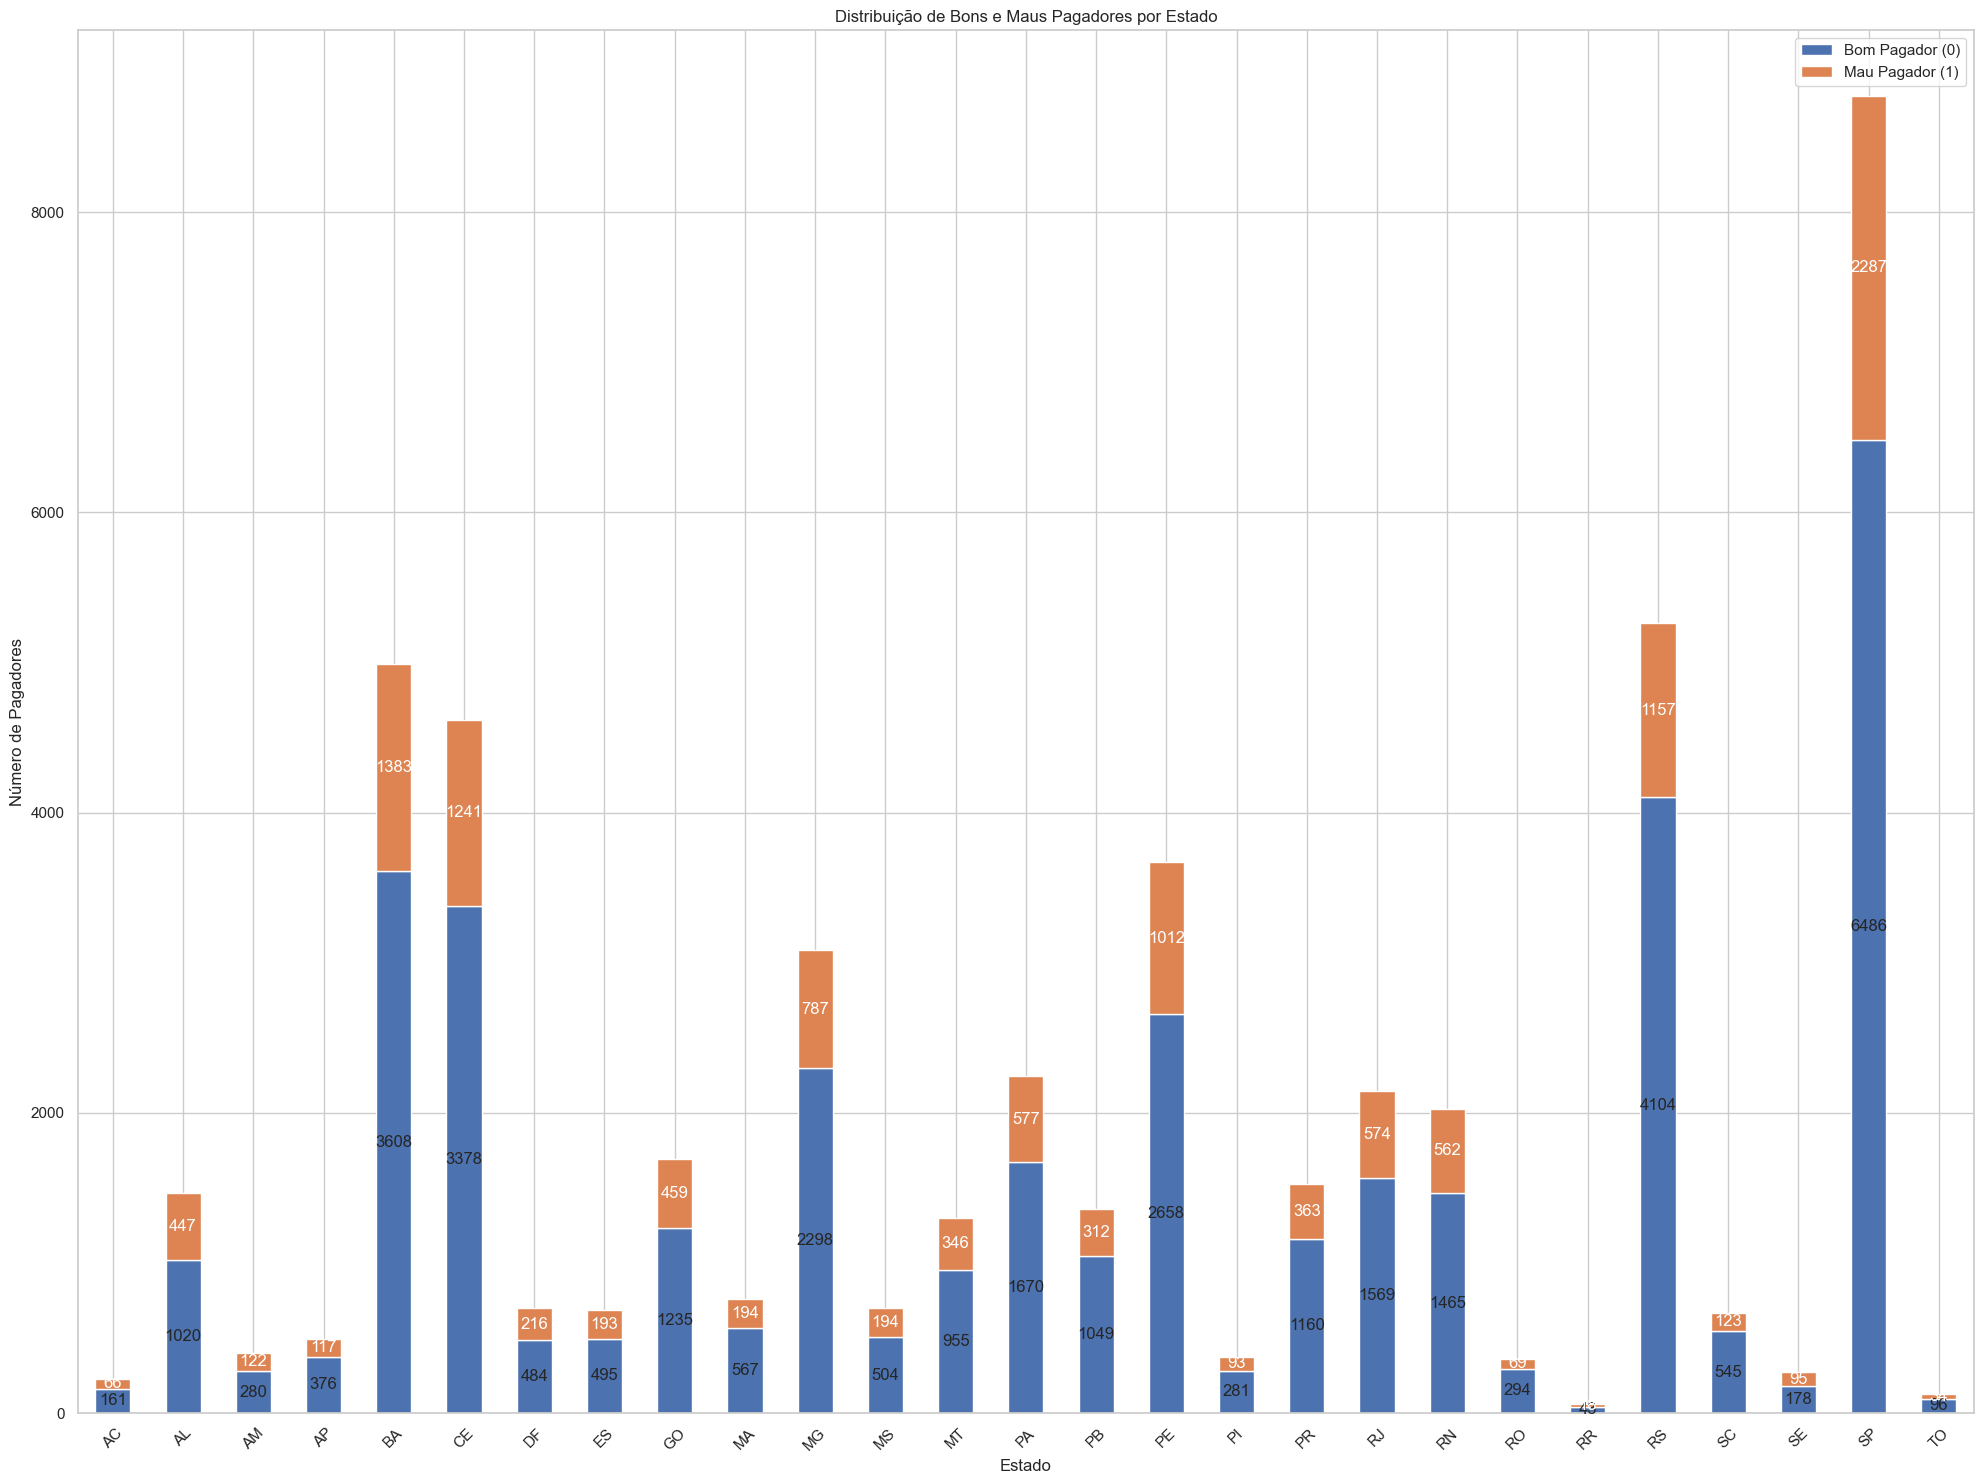

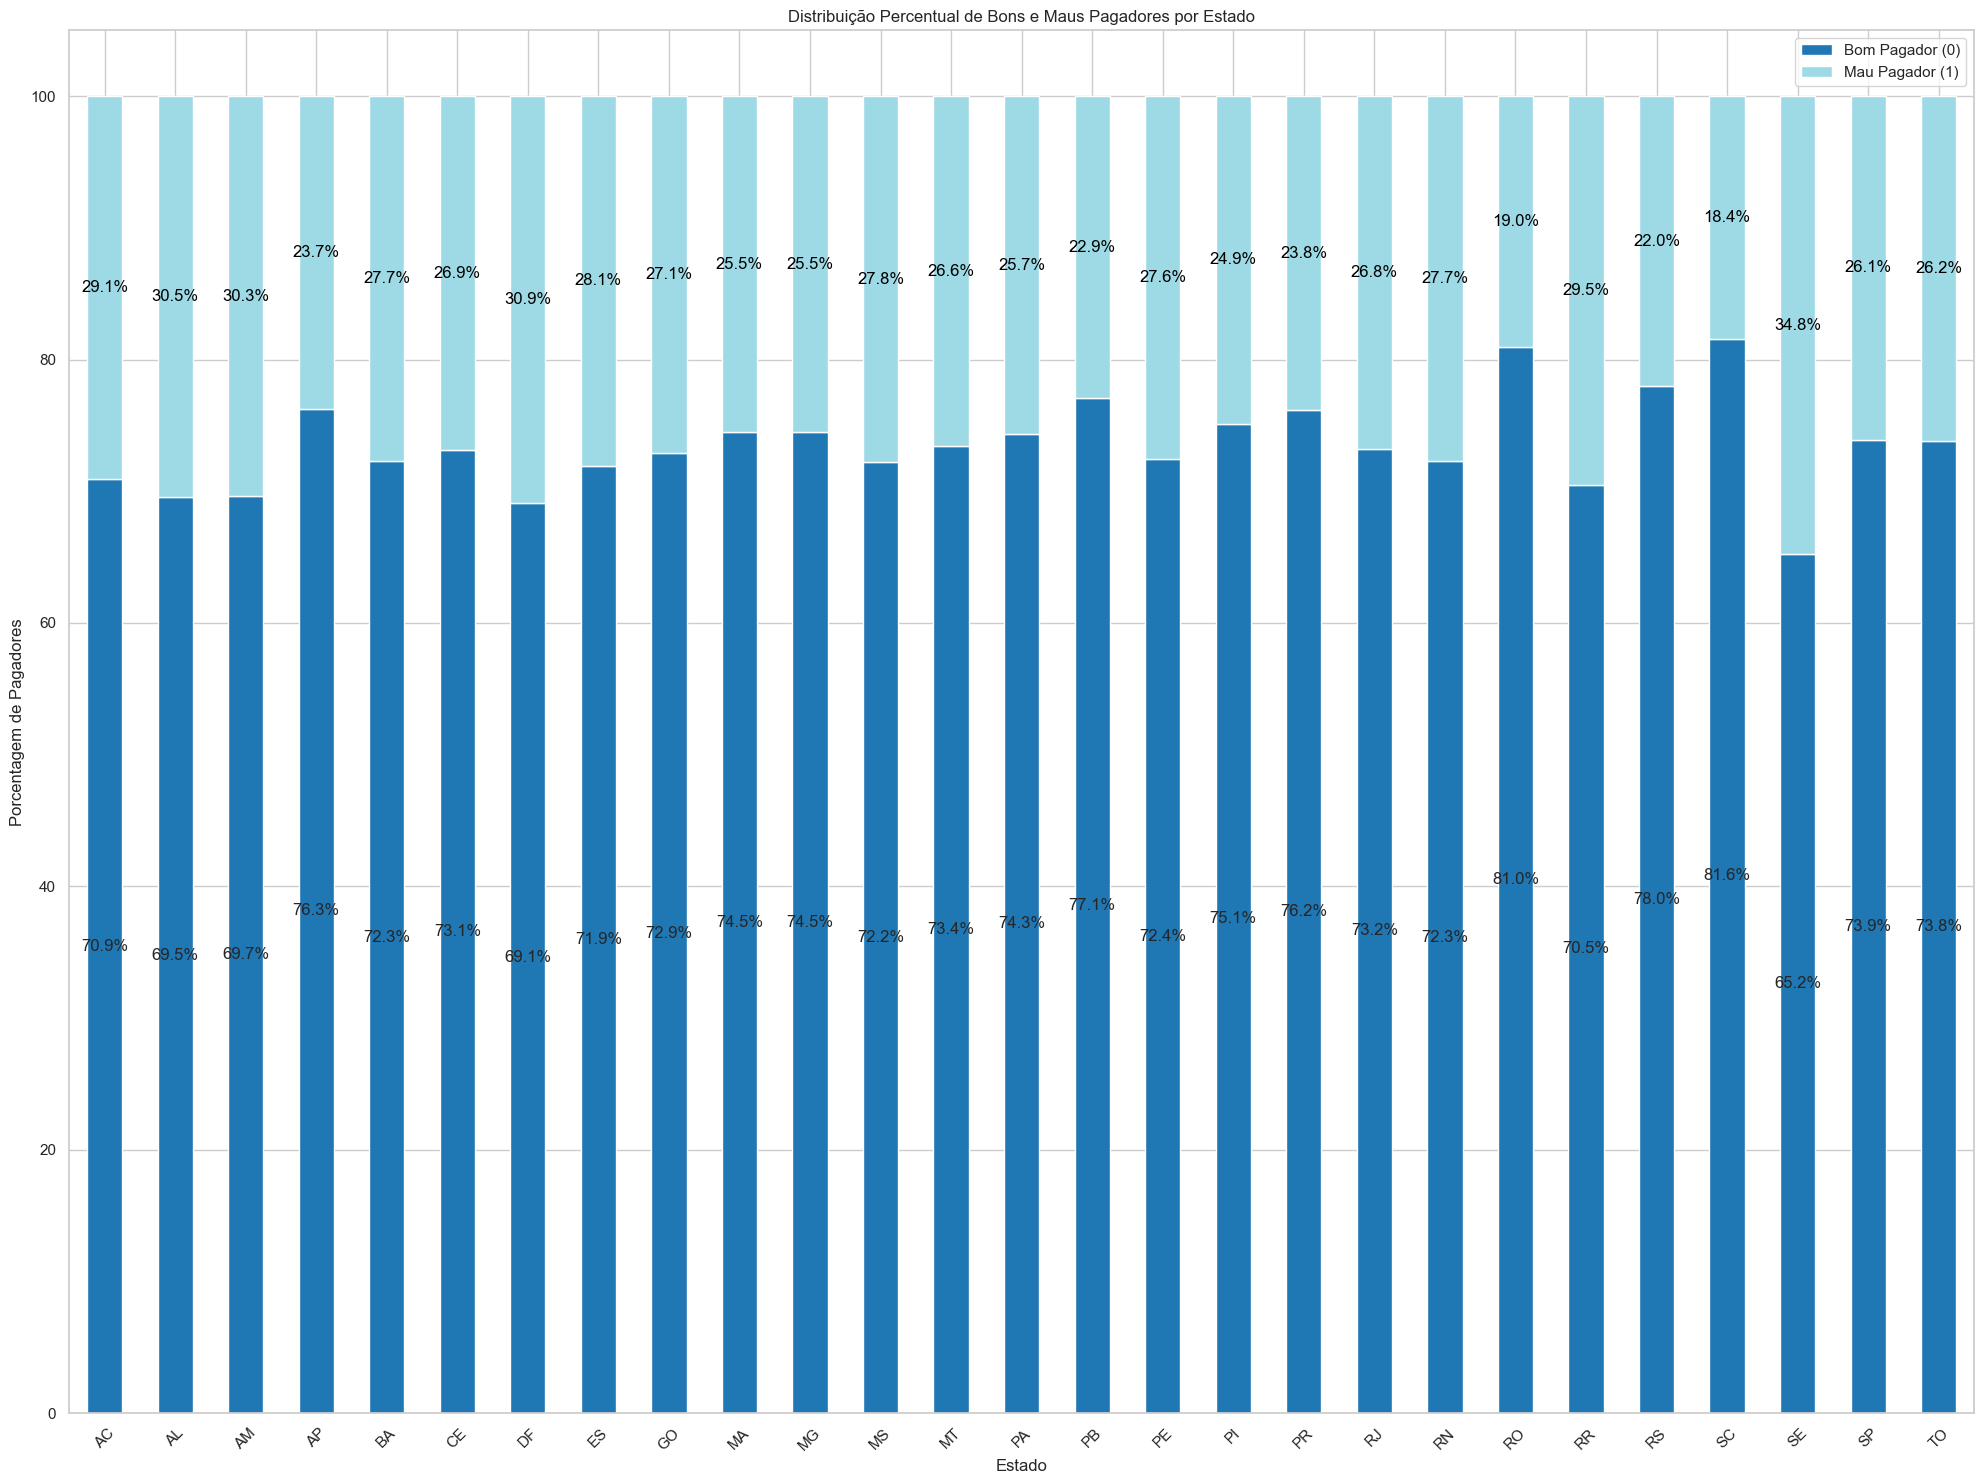

In [66]:

#2.2 Plote um gráfico que mostre a distribuição de bons e maus pagadores por estado. Escolha o gráfico que achar mais conveniente

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_csv("credit.csv", encoding='unicode_escape', sep='\t', header=None)

# parametro recebe informacoes de estados e pagadores
estado_residencial = df[13]  # coluna 14 ESTADO_RESIDENCIAL
pagadores = df[53]           # coluna 54 4 ROTULO_ALVO_MAU=1 


# dataframe criado com estados e pagadores para ver distribuicao por estado
data = pd.DataFrame({
    'State': estado_residencial,
    'Payer': pagadores
})

# Contagem de bons e maus pagadores por estado
total = data.groupby(['State', 'Payer']).size().unstack(fill_value=0)
# Configuração do gráfico de barras
ax = total.plot(kind='bar', stacked=True, figsize=(20, 15))

# quantidade nas barras
ind = np.arange(len(total))
bom = total[0]
mau = total[1]

for x, y, val in zip(ind, bom / 2, bom):
    plt.text(x, y, f"{val}", ha="center", va="center")

for x, y, val in zip(ind, bom + mau / 2, mau):
    plt.text(x, y, f"{val}", ha="center", va="center", color='white')

# gráfico
plt.title('Distribuição de Bons e Maus Pagadores por Estado')
plt.xlabel('Estado')
plt.ylabel('Número de Pagadores')
plt.legend(['Bom Pagador (0)', 'Mau Pagador (1)'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




# Cálculo das porcentagens
percent = total.div(total.sum(axis=1), axis=0) * 100

# Configuração do gráfico de barras empilhadas
ax = percent.plot(kind='bar', stacked=True, figsize=(20, 15), colormap='tab20')

# Quantidade nas barras (em porcentagem)
ind = np.arange(len(percent))
bom = percent[0]
mau = percent[1]

for x, y, val in zip(ind, bom / 2, bom):
    plt.text(x, y, f"{val:.1f}%", ha="center", va="center")

for x, y, val in zip(ind, bom + mau / 2, mau):
    plt.text(x, y, f"{val:.1f}%", ha="center", va="center", color='black')

# Configuração do gráfico
plt.title('Distribuição Percentual de Bons e Maus Pagadores por Estado')
plt.xlabel('Estado')
plt.ylabel('Porcentagem de Pagadores')
plt.legend(['Bom Pagador (0)', 'Mau Pagador (1)'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



2.3 Use boxplot para explicar como o tipo de residência interfere na classificação do pagador
# RESPOSTA: O boxplot mostra que o tipo de residência não interfere na classificação do pagador, pois os dois tipos de residência têm distribuições semelhantes e não há diferença significativa entre as distribuições de pagadores para cada tipo de residência.


/var/folders/1_/71tpy68j3wd3jq9yqnrw15wm0000gn/T/ipykernel_22868/4029213845.py:6: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("credit.csv", encoding='unicode_escape', sep='\t', header=None)


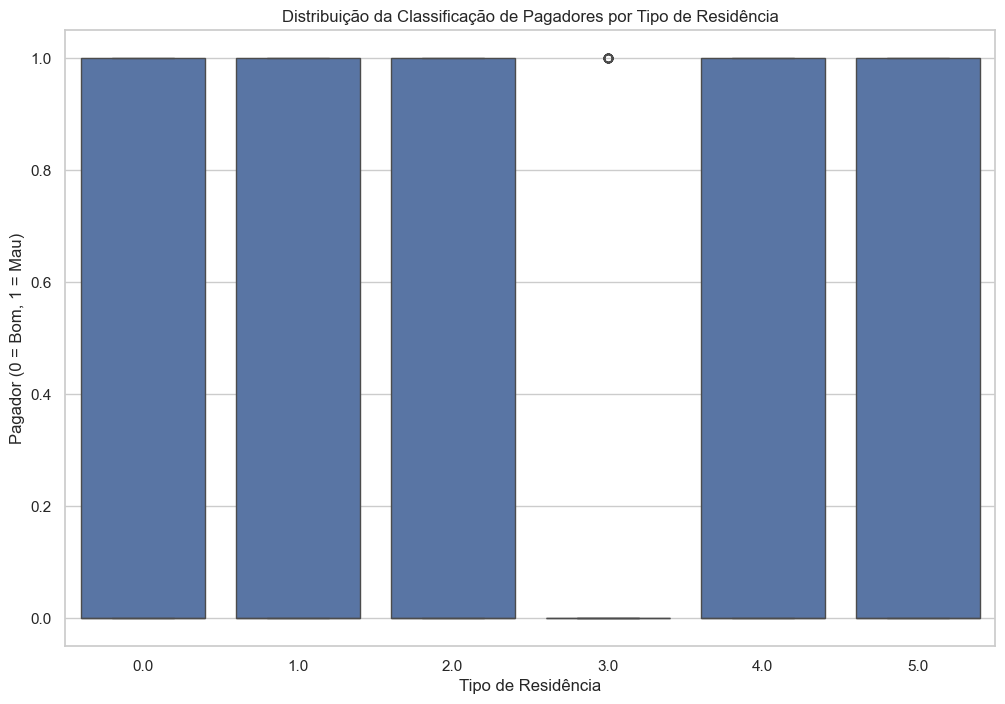

In [41]:

# 2.3 Use boxplot para explicar como o tipo de residência interfere na classificação do pagador

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Leitura do arquivo CSV
df = pd.read_csv("credit.csv", encoding='unicode_escape', sep='\t', header=None)

# Supondo que a coluna do tipo de residência seja a 15ª (índice 14 em zero-based)
tipo_residencia = df[18]  # Coluna 19 TIPO_RESIDENCIA
pagadores = df[53]        # Coluna 54 (Bom = 0, Mau = 1)

# Criação de um DataFrame com as colunas necessárias
dados = pd.DataFrame({
    'Tipo_Residencia': tipo_residencia,
    'Pagador': pagadores
})

# Remover linhas onde 'Tipo_Residencia' é NULL
#dados = dados.dropna(subset=['Tipo_Residencia'])


# Criar o boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Tipo_Residencia', y='Pagador', data=dados)

# Configuração do gráfico
plt.title('Distribuição da Classificação de Pagadores por Tipo de Residência')
plt.xlabel('Tipo de Residência')
plt.ylabel('Pagador (0 = Bom, 1 = Mau)')

# Exibir o gráfico
plt.show()


 2.4 Como as features renda pessoal mensal e outras rendas se relacionam com a variável meta? (obs: não é correlação estatística)
# RESPOSTA: Análise das diferenças de distribuição: A Renda Pessoal Mensal e as Outras Rendas nao mostram diferenças significativas nas distribuições entre as categorias de Meta. Tem uma outliner que ganha mais de R$175.000 por mes e é bom pagador.

/var/folders/1_/71tpy68j3wd3jq9yqnrw15wm0000gn/T/ipykernel_6673/3253833596.py:8: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("credit.csv", encoding='unicode_escape', sep='\t', header=None)


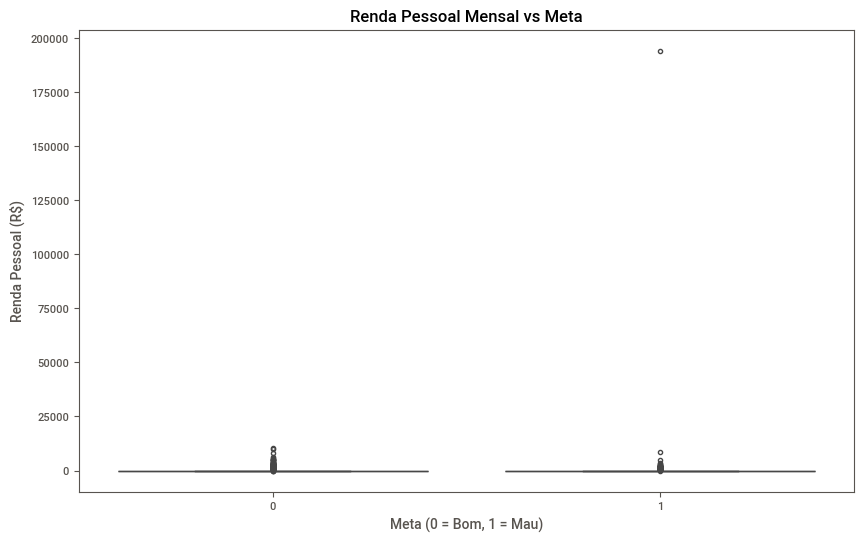

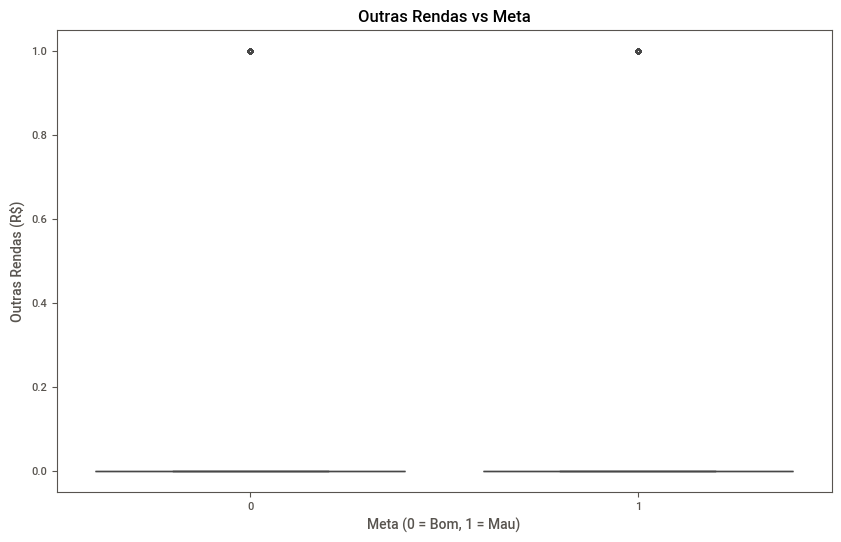

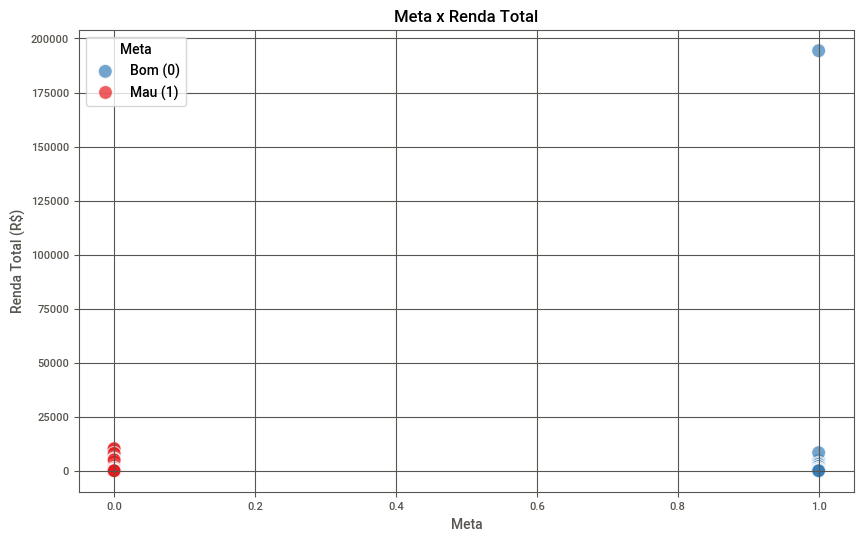

In [ ]:
# 2.4 Como as features renda pessoal mensal e outras rendas se relacionam com a variável meta? (obs: não é correlação estatística)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar os dados
df = pd.read_csv("credit.csv", encoding='unicode_escape', sep='\t', header=None)

# Selecionar as colunas relevantes
renda_pessoal = df[23]       # Coluna 24 - Renda pessoal mensal
outras_rendas = df[24]       # Coluna 25 - Outras rendas
meta = df[53]                # Coluna 54 - Meta (Bom = 0, Mau = 1)

# Criar um DataFrame com os dados relevantes
dados = pd.DataFrame({
    'Renda_Pessoal': renda_pessoal,
    'Outras_Rendas': outras_rendas,
    'Meta': meta
})

dados = dados.dropna()

# Gráfico de dispersão para Renda Pessoal vs Meta
plt.figure(figsize=(10, 6))
sns.boxplot(x='Meta', y='Renda_Pessoal', data=dados)
plt.title('Renda Pessoal Mensal vs Meta')
plt.xlabel('Meta (0 = Bom, 1 = Mau)')
plt.ylabel('Renda Pessoal (R$)')
plt.show()

# Gráfico de dispersão para Outras Rendas vs Meta
plt.figure(figsize=(10, 6))
sns.boxplot(x='Meta', y='Outras_Rendas', data=dados)
plt.title('Outras Rendas vs Meta')
plt.xlabel('Meta (0 = Bom, 1 = Mau)')
plt.ylabel('Outras Rendas (R$)')
plt.show()

# Criar a variável Renda Total = Renda Pessoal + Outras Rendas
dados['Renda_Total'] = dados['Renda_Pessoal'] + dados['Outras_Rendas']

# Criar gráfico de dispersão  Renda Tota
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dados, x='Meta', y='Renda_Total', hue='Meta', palette='Set1', s=100, alpha=0.7)
plt.title('Meta x Renda Total')
plt.xlabel('Meta')
plt.ylabel('Renda Total (R$)')
plt.legend(title='Meta', labels=['Bom (0)', 'Mau (1)'])
plt.grid(True)
plt.show()



 2.5  A idade interfere na classificação do pagador?
 # RESPOSTA: Pela media os melhores padadores estao na faixa de 44 anos e os piores pagadores estao na faixa de 38 anos. ANALISANDO ???

/var/folders/1_/71tpy68j3wd3jq9yqnrw15wm0000gn/T/ipykernel_22868/1704754076.py:8: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("credit.csv", encoding='unicode_escape', sep='\t', header=None)


           count       mean        std  min   25%   50%   75%    max
Pagador                                                             
0        36959.0  44.209097  14.959259  6.0  32.0  43.0  55.0  106.0
1        13041.0  40.526187  14.737388  7.0  29.0  38.0  49.0  106.0


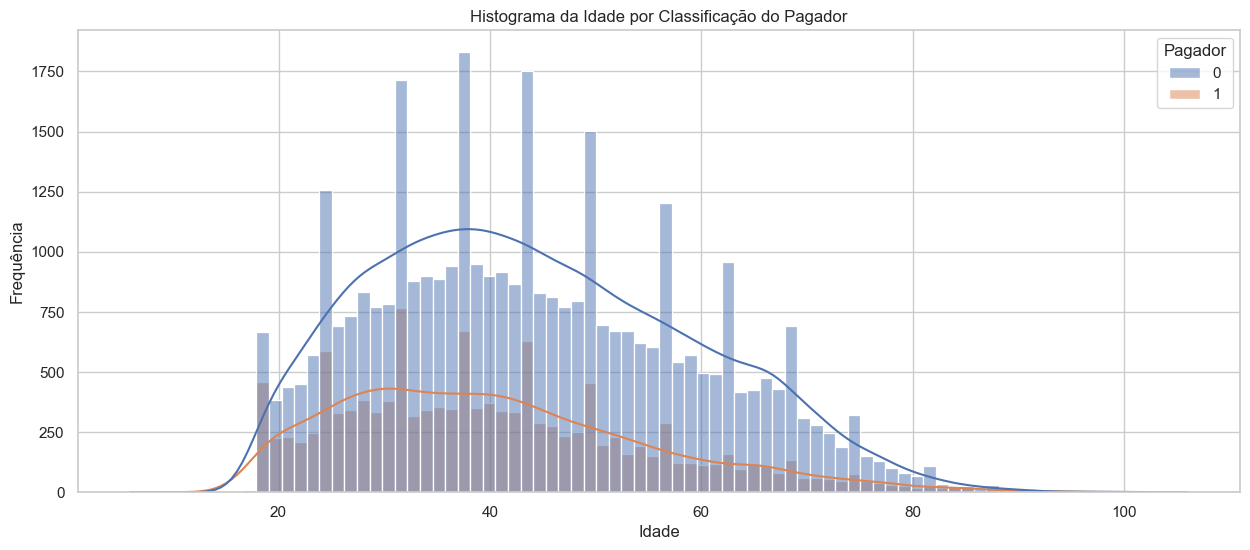

In [ ]:
 #2.5  A idade interfere na classificação do pagador?

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Leitura do arquivo CSV
df = pd.read_csv("credit.csv", encoding='unicode_escape', sep='\t', header=None)

# Supondo que a coluna da idade seja a 13 e a meta (classificação) seja a 54 (ajustar conforme necessário):
idade = df[50]  # Coluna 51 idade
pagador = df[53]   # Coluna meta (Bom = 0, Mau = 1)

# Criação de um DataFrame com as colunas de interesse
dados = pd.DataFrame({
    'Idade': idade,
    'Pagador': pagador
})

# Remover valores nulos
dados = dados.dropna()

# Resumo estatístico por grupo
resumo = dados.groupby('Pagador')['Idade'].describe()
print(resumo)

# Histograma da idade por meta
plt.figure(figsize=(15, 6))
sns.histplot(data=dados, x='Idade', hue='Pagador', kde=True, element="bars")
plt.title('Histograma da Idade por Classificação do Pagador')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

